In [1]:
import matplotlib.pyplot as plt
import cv2


In [2]:
cat=cv2.imread('../Data/CATS_DOGS/train/CAT/0.jpg')

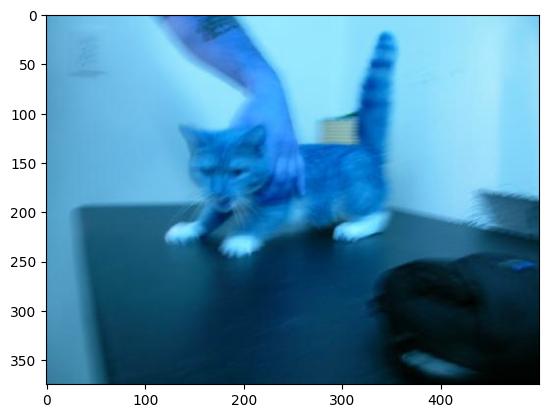

In [3]:
plt.imshow(cat)

In [4]:
cat  = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

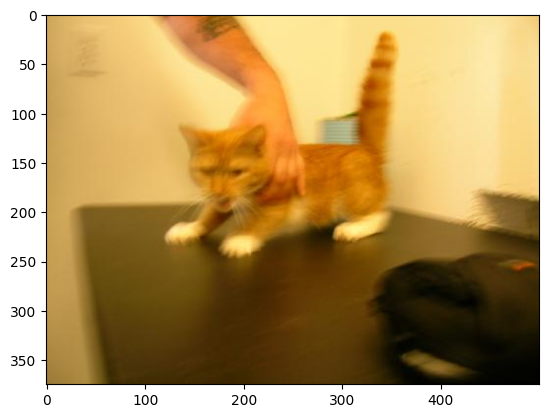

In [5]:
plt.imshow(cat)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

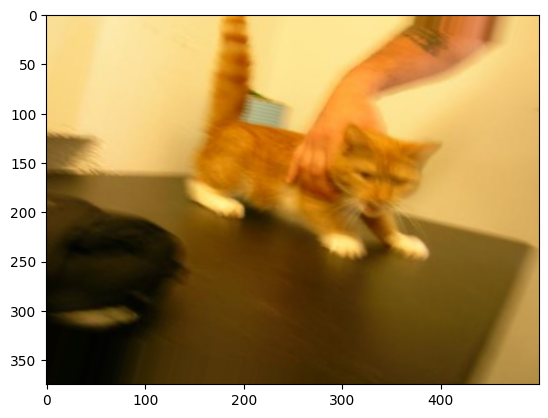

In [8]:
plt.imshow(image_gen.random_transform(cat))


In [9]:
image_gen.flow_from_directory('../Data/CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [10]:
from keras.layers import Dense,Activation, Dropout, Flatten, Conv2D,MaxPooling2D

In [11]:
input_shape=(150,150,3)

In [12]:
from keras.models import Sequential

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\vij15\OneDrive\Documents\GitHub\opencvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
batch_size=16

train_image_gen=image_gen.flow_from_directory('../Data/CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [15]:

test_image_gen=image_gen.flow_from_directory('../Data/CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [16]:
results=model.fit(train_image_gen,epochs=100,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/100


C:\Users\vij15\OneDrive\Documents\GitHub\opencvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.5107 - loss: 0.7046 - val_accuracy: 0.5521 - val_loss: 0.6870
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.5327 - loss: 0.6880 - val_accuracy: 0.5417 - val_loss: 0.6613
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 160ms/step - accuracy: 0.5573 - loss: 0.6871 - val_accuracy: 0.5625 - val_loss: 0.6779
Epoch 4/100
 68/150 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.5693 - loss: 0.6858

KeyboardInterrupt: 